In [14]:
import numpy as np
import pandas as pd
import glob
import string

from sklearn.model_selection import train_test_split
from nltk.tag import pos_tag
import nltk

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Importing Dataset

We import the CSV files

In [15]:
all_data = pd.DataFrame()
for f in glob.glob("./data/*.csv"):
    df = pd.read_csv(f)
    all_data = all_data.append(df,ignore_index=True)

In [16]:
all_data.info()
all_data = all_data.sample(frac=1).reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232 entries, 0 to 2231
Data columns (total 20 columns):
id                       2232 non-null float64
id_str                   2232 non-null object
screen_name              2232 non-null object
location                 1420 non-null object
description              1911 non-null object
url                      1212 non-null object
followers_count          2232 non-null int64
friends_count            2232 non-null int64
listedcount              2232 non-null int64
created_at               2232 non-null object
favourites_count         2232 non-null int64
verified                 2232 non-null bool
statuses_count           2232 non-null int64
lang                     2232 non-null object
status                   2203 non-null object
default_profile          2232 non-null bool
default_profile_image    2232 non-null bool
has_extended_profile     2154 non-null object
name                     2232 non-null object
bot                      2232

In [4]:
all_data.head(4)

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listedcount,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
0,2.349723e+07,23497233,Sia,wherever the squirrels are.,i am sia i was born from the bumhole of a unic...,http://t.co/K82Te22MSF,2838072,261,7044,Mon Mar 09 20:40:56 +0000 2009,27,True,15473,en,"{u'contributors': None, u'truncated': False, u...",False,False,False,sia,0
1,7.830000e+17,7.83E+17,Schnyder2885,NaN,ayang University studen,NaN,1,41,1,Sun Oct 02 13:42:20 +0000 2016,80,False,126,en,"{""created_at"": ""Mon Mar 13 02:56:59 +0000 2017...",True,False,False,Marielle Schnyder,1
2,4.844213e+09,4844213258,ZEazr1987,"Jerseyville, United States",Give me a museum and I'll fill it.,NaN,1,315,0,2/1/16,13,False,27,en,null,True,False,False,ZEazr1987,1
3,7.790000e+17,7.79E+17,TheBigFatTechie,"Mumbai, India","Acquisition Editor, Packt | All views are my o...",https://t.co/EPxBiKBTLF,22,97,0,9/21/16,15,False,85,en,"Status(contributors=None, truncated=False, tex...",False,False,True,Kevin Sequeira,0


In [5]:
train, test = train_test_split(all_data, test_size = 0.2)

In [6]:
train.shape , test.shape

((1785, 20), (447, 20))

# Visualizing Data

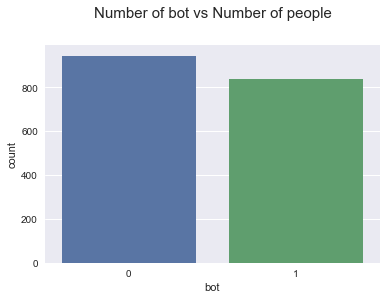

In [7]:
plt.title('Number of bot vs Number of people', y=1.1, size=15)
sns.countplot('bot', data=train)

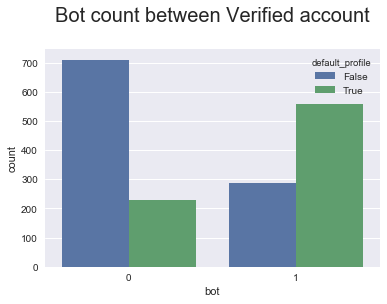

In [8]:
plt.title('Bot count between Verified account', size=20, y=1.1)
sns.countplot(x = 'bot', hue='default_profile', data=train)

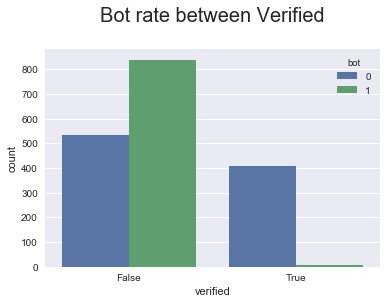

In [10]:
plt.title('Bot rate between Verified', size=20, y=1.1)
sns.countplot(x='verified', hue='bot', data=train)

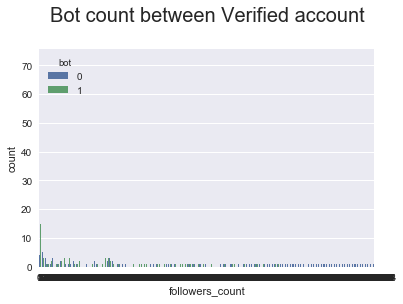

In [11]:
plt.title('Bot count between Verified account', size=20, y=1.1)
sns.countplot(x = 'followers_count', hue='bot', data=train)

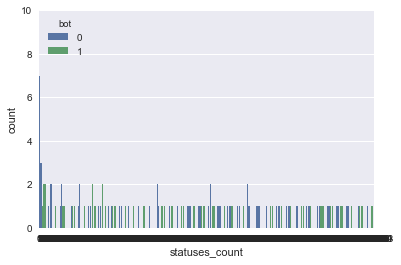

In [38]:
plt.xlim(0, 10)
plt.ylim(0, 10)
sns.countplot(x = 'statuses_count', hue='bot', data=train)

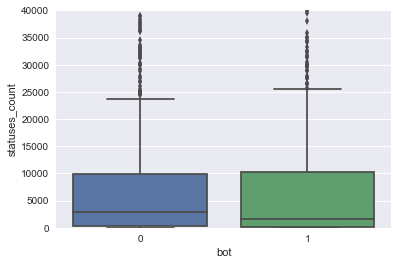

In [32]:
plt.ylim(0, 40000)
sns.boxplot(x='bot', y='statuses_count', data=train)

count    1.785000e+03
mean     9.689370e+05
std      5.355878e+06
min      0.000000e+00
25%      4.500000e+01
50%      3.430000e+02
75%      1.307100e+04
max      9.632156e+07
Name: followers_count, dtype: float64

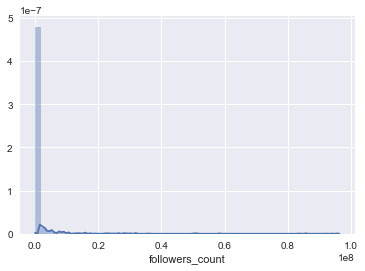

In [11]:
sns.distplot(train['followers_count'])
train['followers_count'].describe()

In [10]:
def lexical_diversity(text):
  if len(text) == 0:
    diversity = 0
  else: 
    diversity = float(len(set(text))) / len(text)
  return diversity

def screenname_format(text):
  if text[-1:].isdigit():
    return True
  else: 
    return False

def screenname_length(text):
    return len(str(text))

def screenname_digitcount(text):
    c = 0
    for x in text:
        if x.isdigit():
            c+=1
    return c

import re
def sn_lastone(text):
    if re.match(r'[A-Za-z0-9]',text[-1:]):
        return str(text[-1:])
    else:
        return "PP"

In [20]:
train.loc[:,'last_numeric'] = train.screen_name.apply(screenname_format)
train.loc[:,'sn_length'] = train.screen_name.apply(screenname_length)
train.loc[:,'sn_digitcount'] = train.screen_name.apply(screenname_digitcount)
train.loc[:,'sn_lastone'] = train.screen_name.apply(sn_lastone)

In [21]:
test.loc[:,'last_numeric'] = test.screen_name.apply(screenname_format)
test.loc[:,'sn_length'] = test.screen_name.apply(screenname_length)
test.loc[:,'sn_digitcount'] = test.screen_name.apply(screenname_digitcount)
test.loc[:,'sn_lastone'] = test.screen_name.apply(sn_lastone)

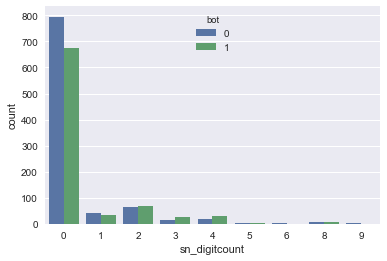

In [72]:
sns.countplot(x ='sn_digitcount', hue='bot' ,data=train)

In [22]:
train.loc[:,'description'].fillna("")
train.loc[:,'desc_length'] = train.description.apply(screenname_length)

In [23]:
test.loc[:,'description'].fillna("")
test.loc[:,'desc_length'] = test.description.apply(screenname_length)

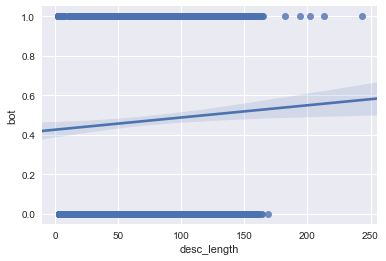

In [81]:
ax = sns.regplot(x=train['desc_length'], y=train['bot'])

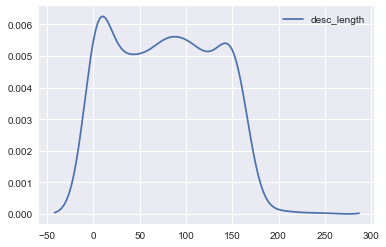

In [87]:
df1 = train[['desc_length','bot']]
bot_len  = df1.ix[(df1['bot']==1)]
sns.distplot(bot_len['desc_length'])

In [11]:
import numpy as np
x = [0,1,2,4,100]
x = np.array(x)
x.std()

39.322258327822425

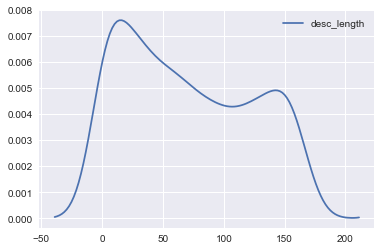

In [93]:
df1 = train[['desc_length','bot']]
nbot_len  = df1.ix[(df1['bot']==0)]
sns.kdeplot(nbot_len['desc_length'])

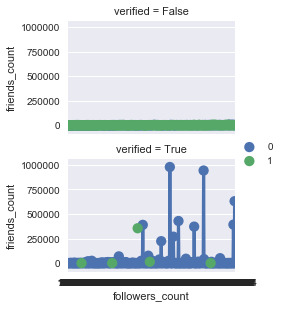

In [94]:
grid = sns.FacetGrid(train, row='verified', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'followers_count', 'friends_count', 'bot', palette='deep')
grid.add_legend()

In [24]:
grouped = train['screen_name']
train['diversity'] = grouped.apply(lexical_diversity)

In [25]:
grouped = test['screen_name']
test['diversity'] = grouped.apply(lexical_diversity)

In [13]:
df1 = train[['diversity','bot']]
bot_diversity  = df1.ix[(df1['bot']==1)]
Nonbot_diversity = df1.ix[(df1['bot']==0)]
bot_diversity.shape, Nonbot_diversity.shape

/Users/Vignesh/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


((845, 2), (940, 2))

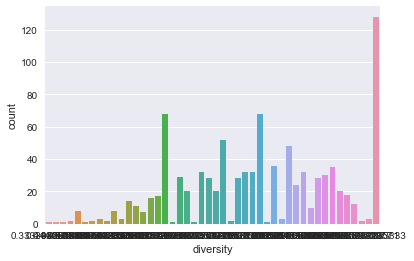

In [14]:
sns.countplot(x = Nonbot_diversity['diversity'], data=Nonbot_diversity)

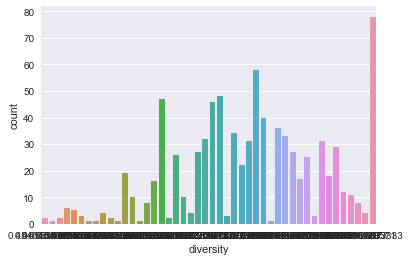

In [15]:
sns.countplot(x = bot_diversity['diversity'], data=bot_diversity)

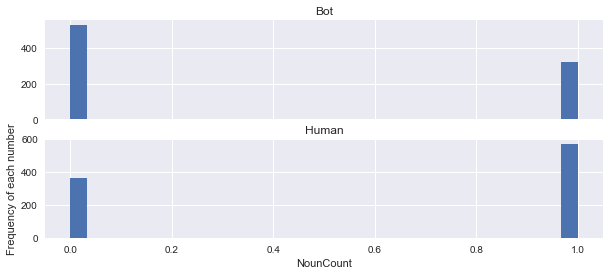

In [22]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,4))

bins = 30

ax1.hist(train.null_url[train.bot == 1], bins = bins)
ax1.set_title('Bot')

ax2.hist(train.null_url[train.bot == 0], bins = bins)
ax2.set_title('Human')

plt.xlabel('NounCount')
plt.ylabel('Frequency of each number')
plt.show()

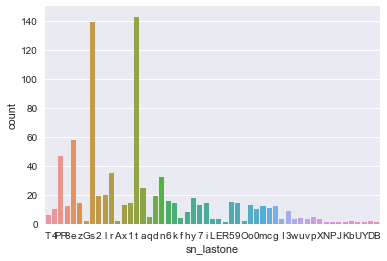

In [85]:
df1 = train[['sn_lastone','bot']]
bot_ = df1.ix[(df1['bot']==1)]
Nonbot_ = df1.ix[(df1['bot']==0)]
sns.countplot(x = bot_['sn_lastone'], data=bot_)

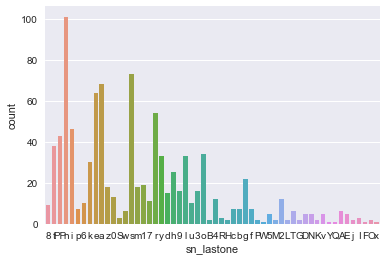

In [86]:
sns.countplot(x = Nonbot_['sn_lastone'], data=Nonbot_)

In [105]:
#print sum(Nonbot_['sn_lastone'] == 'PP'), sum(bot_['sn_lastone'] == 'PP')
df1 = train[['last_numeric','bot']]
bot_ = df1.ix[(df1['bot']==1)]
Nonbot_ = df1.ix[(df1['bot']==0)]
print sum(Nonbot_['last_numeric'] == False), sum(bot_['last_numeric'] == False)

823 707


In [26]:
train.name.fillna("")

def words(text):
    if text is None or text == "~!��????��?~":
        return 0
    text.translate(None, string.punctuation)
    return len(nltk.word_tokenize(text))

train.loc[:,'wordname_len'] = train.name.apply(words)
test.loc[:,'wordname_len'] = test.name.apply(words)

UnicodeDecodeError: 'ascii' codec can't decode byte 0x8d in position 2: ordinal not in range(128)

In [128]:
train[['wordname_len', 'bot']].groupby(['wordname_len'], as_index=False).mean().sort_values(by='bot', ascending=False)

,wordname_len,bot
4,5,0.794118
3,4,0.621951
2,3,0.616236
5,6,0.600000
0,1,0.575243
6,7,0.500000
7,8,0.500000
1,2,0.359053


In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,4))

bins = 30

ax1.hist(train.wordname_len[train.bot == 1], bins = bins)
ax1.set_title('Bot')

ax2.hist(train.wordname_len[train.bot == 0], bins = bins)
ax2.set_title('Human')

plt.xlabel('NounCount')
plt.ylabel('Frequency of each number')
plt.show()

In [7]:
df3 = train[['friends_count','favourites_count','bot']]
bot_ff = df3.ix[(df3['bot']==1)]
Nonbot_ff = df3.ix[(df3['bot']==0)]

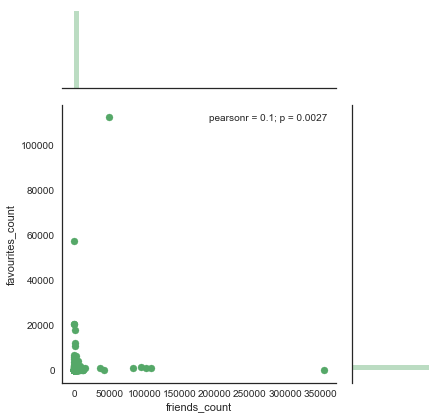

In [13]:
sns.set(style="white", color_codes=True)
g = sns.jointplot(x="friends_count", y="favourites_count",data=bot_ff,ratio=3,color='g')

In [27]:
train.loc[:,'null_url'] = train.url.apply(lambda x: 1 if (str(x).find('http'))!=-1 else 0)
test.loc[:,'null_url'] = test.url.apply(lambda x: 1 if (str(x).find('http'))!=-1 else 0)

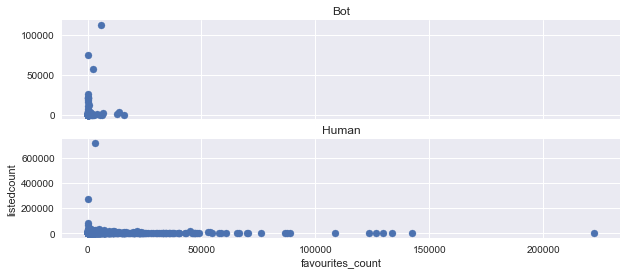

In [17]:



f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,4))

bins = 2

ax1.scatter(train.listedcount[train.bot == 1],train.favourites_count[train.bot == 1] )
ax1.set_title('Bot')

ax2.scatter( train.listedcount[train.bot == 0],train.favourites_count[train.bot == 0])
ax2.set_title('Human')

plt.xlabel('favourites_count')
plt.ylabel('listedcount')
plt.show()

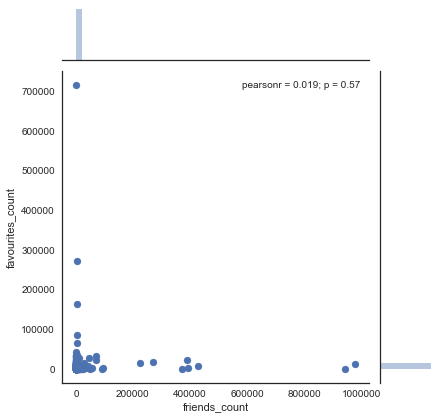

In [9]:
sns.set(style="white", color_codes=True)
g = sns.jointplot(x="friends_count", y="favourites_count",data=Nonbot_ff)

In [18]:
train.describe()

,id,followers_count,friends_count,listedcount,favourites_count,statuses_count,bot,null_url
count,1.785000e+03,1.785000e+03,1785.000000,1785.000000,1785.000000,1.785000e+03,1785.000000,1785.000000
mean,1.532695e+17,9.528917e+05,4224.024650,2994.651541,1967.080672,2.088745e+04,0.473950,0.496359
std,3.143030e+17,5.046356e+06,42279.351013,12359.116569,18900.016013,1.853152e+05,0.499461,0.500127
min,1.148900e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,7.038730e+07,4.600000e+01,10.000000,1.000000,0.000000,1.530000e+02,0.000000,0.000000
50%,1.937940e+09,3.540000e+02,184.000000,18.000000,23.000000,2.120000e+03,0.000000,0.000000
75%,3.341872e+09,1.234900e+04,661.000000,313.000000,423.000000,9.767000e+03,1.000000,1.000000
max,8.410000e+17,9.632156e+07,978964.000000,222411.000000,714021.000000,6.863363e+06,1.000000,1.000000


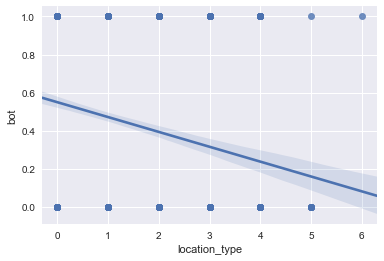

In [155]:
train.location_len.describe()
ax = sns.regplot(x=train['location_type'], y=train['bot'])

In [152]:
def get_Noun(x):
    word = str(x).strip()
    count = 0
    tagged_sent = pos_tag(word.split())
    for w in tagged_sent:
        if w[1] == 'NNP':
            count+=1
    return count

In [46]:
train['name'] = train['name'].fillna("")
train['NounCount'] = train['name'].apply(get_Noun)

/Users/Vignesh/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/Vignesh/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [47]:
train.head()

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listedcount,created_at,...,default_profile,default_profile_image,has_extended_profile,name,bot,diversity,last_numeric,sn_length,sn_digitcount,NounCount
1513,519659488.0,519659488,vaibhav078,Los Angeles,NaN,NaN,59,94,1,Fri Mar 09 17:24:26 +0000 2012,...,False,False,False,Vaibhav Chhabra,0,0.800000,True,10,3,2
147,14464766.0,14464766,thelittleidiot,l.a,bald alien. adopted son of john waters. lover ...,https://t.co/FGCfQnsXQs,1344610,2006,11357,Mon Apr 21 17:53:55 +0000 2008,...,False,False,False,moby X���X,0,0.500000,False,14,0,0
1067,196291388.0,196291388,jhouss_,"Campinas, Sգo Paulo",NaN,https://t.co/cPyOAEM9nz,346,280,2,9/28/10,...,False,False,False,"Estevan, Jonathan.",0,0.857143,False,7,0,2
1159,25389599.0,25389599,AdrianPeterson,NaN,NaN,https://t.co/FfrZUCbqj6,1247114,411,4885,3/19/09,...,False,False,False,Adrian Peterson,0,0.785714,False,14,0,1
1470,66511103.0,66511103,tatatessari,NaN,Paz filhos da puta.,NaN,506,257,4,8/17/09,...,False,False,False,talita,0,0.545455,False,11,0,0


# Transforming Features

Since we must deal with numerical feature, we should convert all the following in a binary vector 0/1.
1. verified 
2. default_profile 
3. default_profile_image 
4. has_extended_profile 

In [7]:
train['followers_count'].describe()

count    1.785000e+03
mean     9.015671e+05
std      4.773001e+06
min      0.000000e+00
25%      4.400000e+01
50%      3.470000e+02
75%      1.304900e+04
max      8.568108e+07
Name: followers_count, dtype: float64

In [17]:
def returnDates(x):
    formated_date = ''
    months = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
    if x.startswith('"') and x.endswith('"'): x = x[1:-1]
    date_split = x.split(' ')
    if len(date_split) == 1:
        _date = date_split[0].split('/')
        _date[2] = '20'+_date[2]
        formated_date = ''.join(map(str,_date))
        #print formated_date , date_split, pd.to_datetime(formated_date, format='%m%d%Y', errors='coerce')
    elif len(date_split) == 2:
        _date = date_split[0].split('/')
        formated_date = ''.join(map(str,[_date[1],_date[0],_date[2]]))
        #print formated_date , date_split, pd.to_datetime(formated_date, format='%m%d%Y', errors='coerce')
    elif len(date_split) == 6:
        m = months[date_split[1]]
        formated_date = ''.join(map(str,[m,date_split[2],date_split[5]]))
        if formated_date[-1] == '"': formated_date = formated_date[:-1]
        #print formated_date, date_split, pd.to_datetime(formated_date, format='%m%d%Y', errors='coerce')
    
    return pd.to_datetime(formated_date, format='%m%d%Y', errors='coerce')

In [1]:
train, test = train_test_split(all_data, test_size = 0.2)
train.loc[:,'followers_count'] = pd.qcut(train['followers_count'], 5)
train[['followers_count', 'bot']].groupby(['followers_count'], as_index=False).mean().sort_values(by='followers_count', ascending=True)

NameError: name 'train_test_split' is not defined

In [18]:
def lexical_diversity(text):
  if len(text) == 0:
    diversity = 0
  else: 
    diversity = float(len(set(text))) / len(text)
  return diversity
    
def get_Noun(x):
    word = str(x).strip()
    count = 0
    tagged_sent = pos_tag(word.split())
    for w in tagged_sent:
        if w[1] == 'NNP':
            count+=1
    return count

In [20]:
import sys
train, test = train_test_split(all_data, test_size = 0.2)
def ff_ratio(df):
    df.followers_count = df.followers_count.apply(lambda x: int(x)+1)
    df.friends_count = df.friends_count.apply(lambda x: int(x)+1)
    df.loc[:,'ff_ratio'] = (df.followers_count/df.friends_count)
    return df
    
def simplfy_followerscount(df):
    bins = (0, 46,358,14917,96321560,sys.maxint)
    group_names = ['1_quartile', '2_quartile', '3_quartile', '4_quartile', '5_quartile']
    categories = pd.cut(df.followers_count, bins, labels=group_names)
    df.followers_count = categories
    return df  

def simplfy_friendscount(df):
    bins = (0, 10,197,671,978964,sys.maxint)
    group_names = ['1_quartile', '2_quartile', '3_quartile', '4_quartile', '5_quartile']
    categories = pd.cut(df['friends_count'], bins, labels=group_names)
    df.friends_count = categories
    return df    

def simplfy_listedcount(df):
    df.loc[:,'listedcount']= df.listedcount.apply(lambda x: int(x)+1)
    bins = (0, 2,18,360,222411,sys.maxint)
    group_names = ['1_quartile', '2_quartile', '3_quartile', '4_quartile', '5_quartile']
    categories = pd.cut(df['listedcount'], bins, labels=group_names)
    df.loc[:,'listedcount'] = categories
    return df    



def simplfy_favouritescount(df):
    df.loc[:,'favourites_count']= df.favourites_count.apply(lambda x: int(x)+1)
    bins = (0,2,25,484,714021,sys.maxint)
    group_names = ['1_quartile', '2_quartile', '3_quartile', '4_quartile', '5_quartile']
    categories = pd.cut(df.favourites_count, bins, labels=group_names)
    df.loc[:,'favourites_count']= categories
    return df  

def simplfy_statusescount(df):
    df.loc[:,'statuses_count']= df.statuses_count.apply(lambda x: int(x)+1)
    bins = (0,178,2290,10025,6863363,sys.maxint)
    group_names = ['1_quartile', '2_quartile', '3_quartile', '4_quartile', '5_quartile']
    categories = pd.cut(df.statuses_count, bins, labels=group_names)
    df.loc[:,'statuses_count']= categories
    return df 

def drop_features(df):
    return df.drop(['id', 'id_str', 'location','lang','status','created_at'], axis=1)

def replace_None(df):
    df.loc[:,'has_extended_profile'] = df['has_extended_profile'].fillna(df.has_extended_profile.median())
    return df

def format_date(df):
    df.loc[:,'modified_date'] = df.created_at.apply(returnDates)
    return df

def diversity(df):
    df.loc[:,'description'].fillna("")    
    df.loc[:,'sn_length'] = df.screen_name.apply(lambda text: len(str(text)))
    df.loc[:,'desc_length'] = df.description.apply(lambda text: len(str(text)))
    grouped = df['screen_name']
    df['diversity'] = grouped.apply(lexical_diversity)
    df.loc[:,'null_url'] = df.url.apply(lambda x: 1 if (str(x).find('http'))!=-1 else 0)
    return df


def transform_features(df):
    df = ff_ratio(df)
    df = simplfy_followerscount(df)
    df = simplfy_friendscount(df)
    df = simplfy_listedcount(df)
    df = simplfy_favouritescount(df)
    df = simplfy_statusescount(df)   
    df = replace_None(df)  
    df = format_date(df)
    df = diversity(df)
    df = drop_features(df)
    return df

train = transform_features(train)
test = transform_features(test)
train.head()

/Users/Vignesh/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,screen_name,description,url,followers_count,friends_count,listedcount,favourites_count,verified,statuses_count,default_profile,default_profile_image,has_extended_profile,name,bot,ff_ratio,modified_date,sn_length,desc_length,diversity,null_url
514,tin_vamsi,NaN,NaN,1_quartile,1_quartile,1_quartile,1_quartile,False,1_quartile,True,True,False,Vamsi Ramineedi,0,0.700000,2016-03-11,9,3,0.888889,0
979,TrevisanOlympia,Be��ikta��-SlimShady-Green-16-CA��HL-CA-Tkirda...,NaN,1_quartile,2_quartile,1_quartile,3_quartile,False,1_quartile,True,False,False,Olympia Trevisan,1,0.022222,2017-02-17,15,83,0.866667,0
1677,Xavier_Drummer,"Just trying to follow THE MASTER LEADER JESUS,...",NaN,1_quartile,2_quartile,1_quartile,2_quartile,False,2_quartile,False,False,False,���Mr.Xavier,0,0.358025,2009-07-03,14,144,0.714286,0
65,thebridgebk,The Bridge is a Brooklyn-based website dedicat...,https://t.co/l5BXSV6Bg0,2_quartile,2_quartile,2_quartile,2_quartile,False,1_quartile,True,False,False,The Bridge,0,0.826772,2017-12-04,11,126,0.818182,1
1492,f_jubs,Nessa sofrՎncia que թ amar vocՎ,NaN,2_quartile,3_quartile,1_quartile,3_quartile,False,2_quartile,False,False,False,J�_lia Franco,0,0.210084,2009-08-04,6,34,1.000000,0


In [9]:
np.where(pd.isnull(train.statuses_count))

(array([], dtype=int64),)

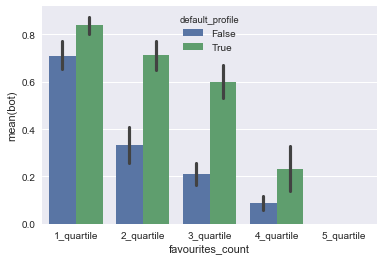

In [21]:
sns.barplot(x="favourites_count", y="bot", hue="default_profile", data=train);

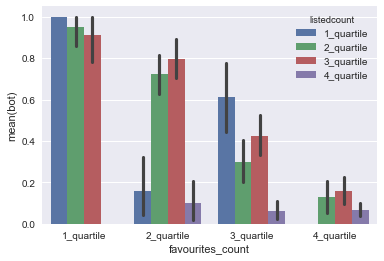

In [46]:
sns.barplot(x="favourites_count", y="bot", hue="listedcount", data=train);

# Final Encoding

The LabelEncoder in Scikit-learn will convert each unique string value into a number, making out data more flexible for various algorithms.

In [29]:
train.head()

,screen_name,description,url,followers_count,friends_count,listedcount,favourites_count,verified,statuses_count,default_profile,...,bot,ff_ratio,modified_date,last_numeric,sn_length,sn_digitcount,sn_lastone,desc_length,diversity,null_url
1798,Weezer,The White Album Deluxe Edition out now - downl...,http://t.co/IIJP32O92E,4_quartile,3_quartile,4_quartile,2_quartile,True,3_quartile,False,...,0,3570.471287,2008-10-10,False,6,0,r,160,0.666667,1
416,NAS6222,NaN,None,1_quartile,1_quartile,1_quartile,1_quartile,False,1_quartile,True,...,1,0.100000,2016-07-29,True,7,4,2,3,0.714286,0
2072,RoyBlunt,Official account of U.S. Senator Roy Blunt. Ho...,http://t.co/PG3SSnhQDI,4_quartile,4_quartile,4_quartile,3_quartile,True,3_quartile,False,...,0,8.060399,2009-02-19,False,8,0,t,93,1.000000,1
1598,ikamalhaasan,"Film buff,Actor, Director, Dancer, Writer, Pro...",NaN,4_quartile,2_quartile,4_quartile,2_quartile,True,2_quartile,False,...,0,22591.945946,2015-12-28,False,12,0,n,51,0.666667,0
2096,rm_everyfile,Deleting my host server one file at a time // ...,NaN,2_quartile,1_quartile,2_quartile,1_quartile,False,3_quartile,False,...,1,92.000000,2016-05-19,False,12,0,e,71,0.750000,0


In [130]:
train.diversity.describe()

count    1785.000000
mean        0.800908
std         0.117187
min         0.214286
25%         0.727273
50%         0.800000
75%         0.888889
max         1.000000
Name: diversity, dtype: float64

In [41]:
from sklearn import preprocessing
def encode_features(df_train, df_test):
    features = ['followers_count','friends_count','listedcount','favourites_count','verified','statuses_count', \
                'default_profile','default_profile_image','has_extended_profile','ff_ratio','sn_length','desc_length'\
                ,'diversity','null_url','sn_lastone']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train.loc[:,feature] = le.transform(df_train[feature])
        df_test.loc[:,feature] = le.transform(df_test[feature])
    return df_train, df_test
    
train, test = encode_features(train, test)
train.head()

,screen_name,description,url,followers_count,friends_count,listedcount,favourites_count,verified,statuses_count,default_profile,...,bot,ff_ratio,modified_date,last_numeric,sn_length,sn_digitcount,sn_lastone,desc_length,diversity,null_url
1798,Weezer,The White Album Deluxe Edition out now - downl...,http://t.co/IIJP32O92E,3,2,3,1,1,2,0,...,0,1804,2008-10-10,False,4,0,53,158,21,1
416,NAS6222,NaN,None,0,0,0,0,0,0,1,...,1,247,2016-07-29,True,5,4,2,1,26,0
2072,RoyBlunt,Official account of U.S. Senator Roy Blunt. Ho...,http://t.co/PG3SSnhQDI,3,3,3,2,1,2,0,...,0,1033,2009-02-19,False,6,0,55,91,51,1
1598,ikamalhaasan,"Film buff,Actor, Director, Dancer, Writer, Pro...",NaN,3,1,3,1,1,1,0,...,0,1931,2015-12-28,False,10,0,49,49,21,0
2096,rm_everyfile,Deleting my host server one file at a time // ...,NaN,1,0,1,0,0,2,0,...,1,1359,2016-05-19,False,10,0,40,69,29,0


In [42]:
train_output = pd.DataFrame(data=train, columns =list(train))
test_output = pd.DataFrame(data=test, columns =list(test))

# Use pandas to write the comma-separated output file
train_output.to_csv("./cleanedData/Bot_Training.csv", index=False)
test_output.to_csv("./cleanedData/Bot_Testing.csv", index=False)

# Splitting up the Training Data


First, separate the features(X) from the labels(y).
* X_all: All features minus the value we want to predict (Bot).
* y_all: Only the value we want to predict.

Second, use Scikit-learn to randomly shuffle this data into four variables. In this case, Training 80% of the data, then testing against the other 20%.

Later, this data will be reorganized into a KFold pattern to validate the effectiveness of a trained algorithm

In [43]:
from sklearn.model_selection import train_test_split

X_all = train.drop(['bot','modified_date','screen_name','description','last_numeric','sn_digitcount','url','name'], axis=1)
y_all = train['bot']

num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)

In [44]:
X_train.shape, y_train.shape

((1428, 15), (1428,))

In [45]:
X_test.shape, y_test.shape

((357, 15), (357,))

In [46]:
X_train.head()

,followers_count,friends_count,listedcount,favourites_count,verified,statuses_count,default_profile,default_profile_image,has_extended_profile,ff_ratio,sn_length,sn_lastone,desc_length,diversity,null_url
921,1,0,1,0,0,1,1,0,0,1120,6,21,153,42,0
1842,1,0,1,1,0,2,0,0,0,1366,11,40,28,39,0
1707,3,0,3,2,0,1,0,0,1,1947,4,26,37,51,1
883,1,0,2,0,0,3,0,0,0,1414,6,49,89,51,1
1586,1,0,2,0,0,2,0,0,0,1432,11,55,100,39,0


# Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV


clf = RandomForestClassifier()

parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

acc_scorer = make_scorer(accuracy_score)

#grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=9, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [48]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.871148459384


In [49]:
from sklearn.cross_validation import KFold

def run_kfold(clf):
    kf = KFold(891, n_folds=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X_all.values[train_index], X_all.values[test_index]
        y_train, y_test = y_all.values[train_index], y_all.values[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

run_kfold(clf)

/Users/Vignesh/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Fold 1 accuracy: 0.877777777778
Fold 2 accuracy: 0.831460674157
Fold 3 accuracy: 0.887640449438
Fold 4 accuracy: 0.820224719101
Fold 5 accuracy: 0.865168539326
Fold 6 accuracy: 0.921348314607
Fold 7 accuracy: 0.85393258427
Fold 8 accuracy: 0.910112359551
Fold 9 accuracy: 0.921348314607
Fold 10 accuracy: 0.85393258427
Mean Accuracy: 0.87429463171


In [50]:
clf.feature_importances_

array([ 0.13983557,  0.10445435,  0.06274451,  0.14608662,  0.09009591,
        0.0292631 ,  0.05704334,  0.00058558,  0.01911899,  0.15778996,
        0.01952405,  0.08615254,  0.04183002,  0.03195849,  0.01351699])

In [51]:
list(X_train)

['followers_count',
 'friends_count',
 'listedcount',
 'favourites_count',
 'verified',
 'statuses_count',
 'default_profile',
 'default_profile_image',
 'has_extended_profile',
 'ff_ratio',
 'sn_length',
 'sn_lastone',
 'desc_length',
 'diversity',
 'null_url']

In [52]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

82.21

In [53]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

78.78

In [56]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print acc_decision_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV


clf = RandomForestClassifier()

parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

acc_scorer = make_scorer(accuracy_score)

#grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

clf.fit(X_train, y_train)

99.93


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=8,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=9, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [57]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.862745098039


In [58]:
run_kfold(decision_tree)

Fold 1 accuracy: 0.788888888889
Fold 2 accuracy: 0.808988764045
Fold 3 accuracy: 0.820224719101
Fold 4 accuracy: 0.775280898876
Fold 5 accuracy: 0.85393258427
Fold 6 accuracy: 0.820224719101
Fold 7 accuracy: 0.831460674157
Fold 8 accuracy: 0.820224719101
Fold 9 accuracy: 0.876404494382
Fold 10 accuracy: 0.820224719101
Mean Accuracy: 0.821585518102


In [59]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV


Ada_clf = AdaBoostClassifier()

parameters = {'n_estimators': [100, 50, 80], 
              'learning_rate': [1.0,0.5],
              'base_estimator': [DecisionTreeClassifier(),clf]
             }

acc_scorer = make_scorer(accuracy_score)

#grid search
grid_obj = GridSearchCV(Ada_clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
Ada_clf = grid_obj.best_estimator_

Ada_clf.fit(X_train, y_train)


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=8,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=9, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          learning_rate=0.5, n_estimators=80, random_state=None)

In [162]:
predictions = Ada_clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.873949579832


In [60]:
run_kfold(Ada_clf)

Fold 1 accuracy: 0.877777777778
Fold 2 accuracy: 0.898876404494
Fold 3 accuracy: 0.876404494382
Fold 4 accuracy: 0.797752808989
Fold 5 accuracy: 0.876404494382
Fold 6 accuracy: 0.887640449438
Fold 7 accuracy: 0.887640449438
Fold 8 accuracy: 0.842696629213
Fold 9 accuracy: 0.898876404494
Fold 10 accuracy: 0.865168539326
Mean Accuracy: 0.870923845194


In [62]:
from sklearn.ensemble import GradientBoostingClassifier
Gb_clf = GradientBoostingClassifier()
Gb_clf.fit(X_train, y_train)

predictions = Gb_clf.predict(X_test)
print(accuracy_score(y_test, predictions))
# use area under the precision-recall curve to show classification accuracy

run_kfold(Gb_clf)

0.882352941176
Fold 1 accuracy: 0.855555555556
Fold 2 accuracy: 0.865168539326
Fold 3 accuracy: 0.898876404494
Fold 4 accuracy: 0.831460674157
Fold 5 accuracy: 0.865168539326
Fold 6 accuracy: 0.887640449438
Fold 7 accuracy: 0.85393258427
Fold 8 accuracy: 0.865168539326
Fold 9 accuracy: 0.932584269663
Fold 10 accuracy: 0.865168539326
Mean Accuracy: 0.872072409488


In [67]:
def get_Noun(x):
    word = x.strip()
    count = 0
    tagged_sent = pos_tag(word.split())
    for w in tagged_sent:
        if w[1] == 'NNP':
            count+=1
        if w[1] == 'VBZ':
            count-=1
    return count

In [68]:
df['name'] = df['name'].fillna("")
train['NounCount'] = df['name'].apply(get_Noun)

In [69]:
train['NounCount'].describe()

count    939.000000
mean       1.436635
std        0.932120
min        0.000000
25%        0.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: NounCount, dtype: float64

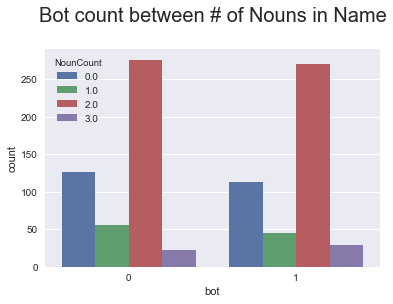

In [70]:
plt.title('Bot count between # of Nouns in Name', size=20, y=1.1)
sns.countplot(x = 'bot', hue='NounCount', data=train)

In [71]:
train['created_at'][0]

Timestamp('2010-07-13 00:00:00')

In [21]:
from datetime import date
import calendar
print type(train['created_at'])
train['days'] = train['created_at'].apply(lambda x: calendar.day_name[x.weekday()])

KeyError: 'created_at'

In [74]:
train['days'].describe()

count         1785
unique           7
top       Thursday
freq           291
Name: days, dtype: object

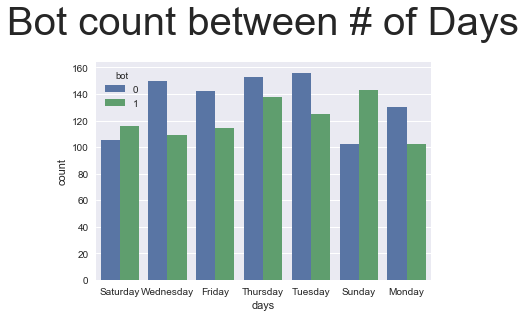

In [77]:
plt.title('Bot count between # of Days', size=40, y=1.1)
sns.countplot(x = 'days', hue='bot', data=train)

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listedcount,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
2084,5.817313e+07,58173133,Maheshbhupathi,"��T: 19.057273,72.825963","An Outlier,Twice over!",https://t.co/hOkJ2t0a4I,947045,271,2618,7/19/09,88,True,4905,en,"Status(contributors=None, truncated=False, tex...",False,False,False,Mahesh Bhupathi,0
1798,1.453254e+07,14532539,tonyromo,"Dallas, TX",Official twitter account of Dallas Cowboys QB ...,NaN,351335,19,1221,4/25/08,395,True,25,en,"Status(contributors=None, truncated=False, tex...",False,False,False,Tony Romo,0
354,2.205977e+09,2205976656,magicpixx,NaN,Follow me for algorithmically-curated pictures...,NaN,10250,10378,194,Thu Nov 21 01:14:23 +0000 2013,211,False,262067,en,"{u'contributors': None, u'truncated': False, u...",True,False,False,Magic Pics,1


(1785, 20)
(1785, 9)
(1785,)


/Users/Vignesh/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Vignesh/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,followers_count,friends_count,listedcount,favourites_count,verified,statuses_count,default_profile,default_profile_image,has_extended_profile
57,1047,299,28,958,False,3098,False,False,False
1361,35,134,7,17,False,989,False,False,False
1141,4,28,0,0,False,2,True,False,True


In [20]:
cross_val_score(clf, train, bot, cv=2)

ValueError: could not convert string to float: False

In [28]:
from sklearn.datasets import load_iris
from sklearn import tree
clf = tree.DecisionTreeClassifier()
iris = load_iris()
clf = clf.fit(iris.data, iris.target)
tree.export_graphviz(clf,out_file='tree.dot') 

In [3]:
import pandas as pd
import json
from pandas import compat

f = open('data.json','r')
df = pd.read_json(f)

ValueError: arrays must all be same length

In [ ]:
    


def to_dict_dropna(df):
   return {int(k): v.dropna().astype(int).to_dict() for k, v in compat.iteritems(df)}

json.dumps(to_dict_dropna(df))